<a href="https://colab.research.google.com/github/siripatsorn6/IkomaLab1/blob/main/DIP_Lap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Colorspace Transformation: from RGB to Gray scale

<class 'numpy.ndarray'> (3456, 4608, 3) uint8


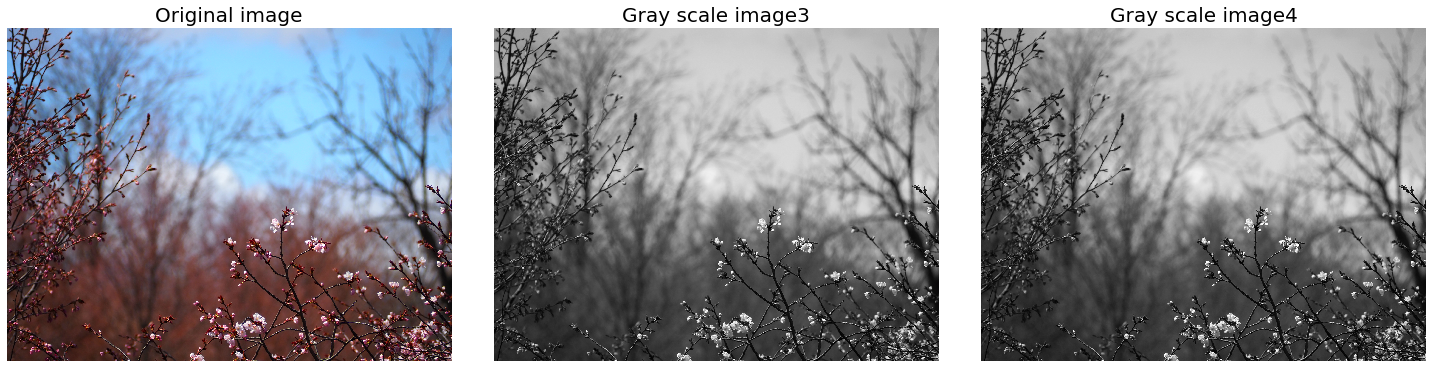

In [6]:
%matplotlib inline
import numpy as np
from skimage import img_as_float
from skimage.io import imread, imsave, imshow, show, imread_collection
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.util import invert
from skimage.exposure import equalize_hist
import matplotlib.pylab as plt
import matplotlib.pyplot as plt2 
import matplotlib.image as mpimg
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat


#Read the input image. Perform a color space transformation—from RGB to Lab color space:
im = imread('gdrive/My Driver/flower.JPG')


print(type(im), im.shape, im.dtype)

########
im_g = rgb2lab(im)
im_g[...,1] = im_g[...,2] = 0
im_g = lab2rgb(im_g)
########
im3 = rgb2gray(im)  # 0.2989 * r + 0.5870 * g + 0.1140 * b


#Plot the input and output images, as shown in the following code:
plt.figure(figsize=(20,10))
plt.subplot(131), imshow(im), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(132), imshow(im_g), plt.axis('off'), plt.title('Gray scale image3', size=20)
plt.subplot(133), imshow(im3, vmin=0,vmax=1), plt.axis('off'), plt.title('Gray scale image4', size=20)
plt.show()


convert JPG to PNG

In [9]:
from PIL import Image

im = Image.open('gdrive/My Driver/flower.JPG')
im.save('gdrive/My Driver/flower.JPG')

Built-in *library* converting RGB to Gray scale

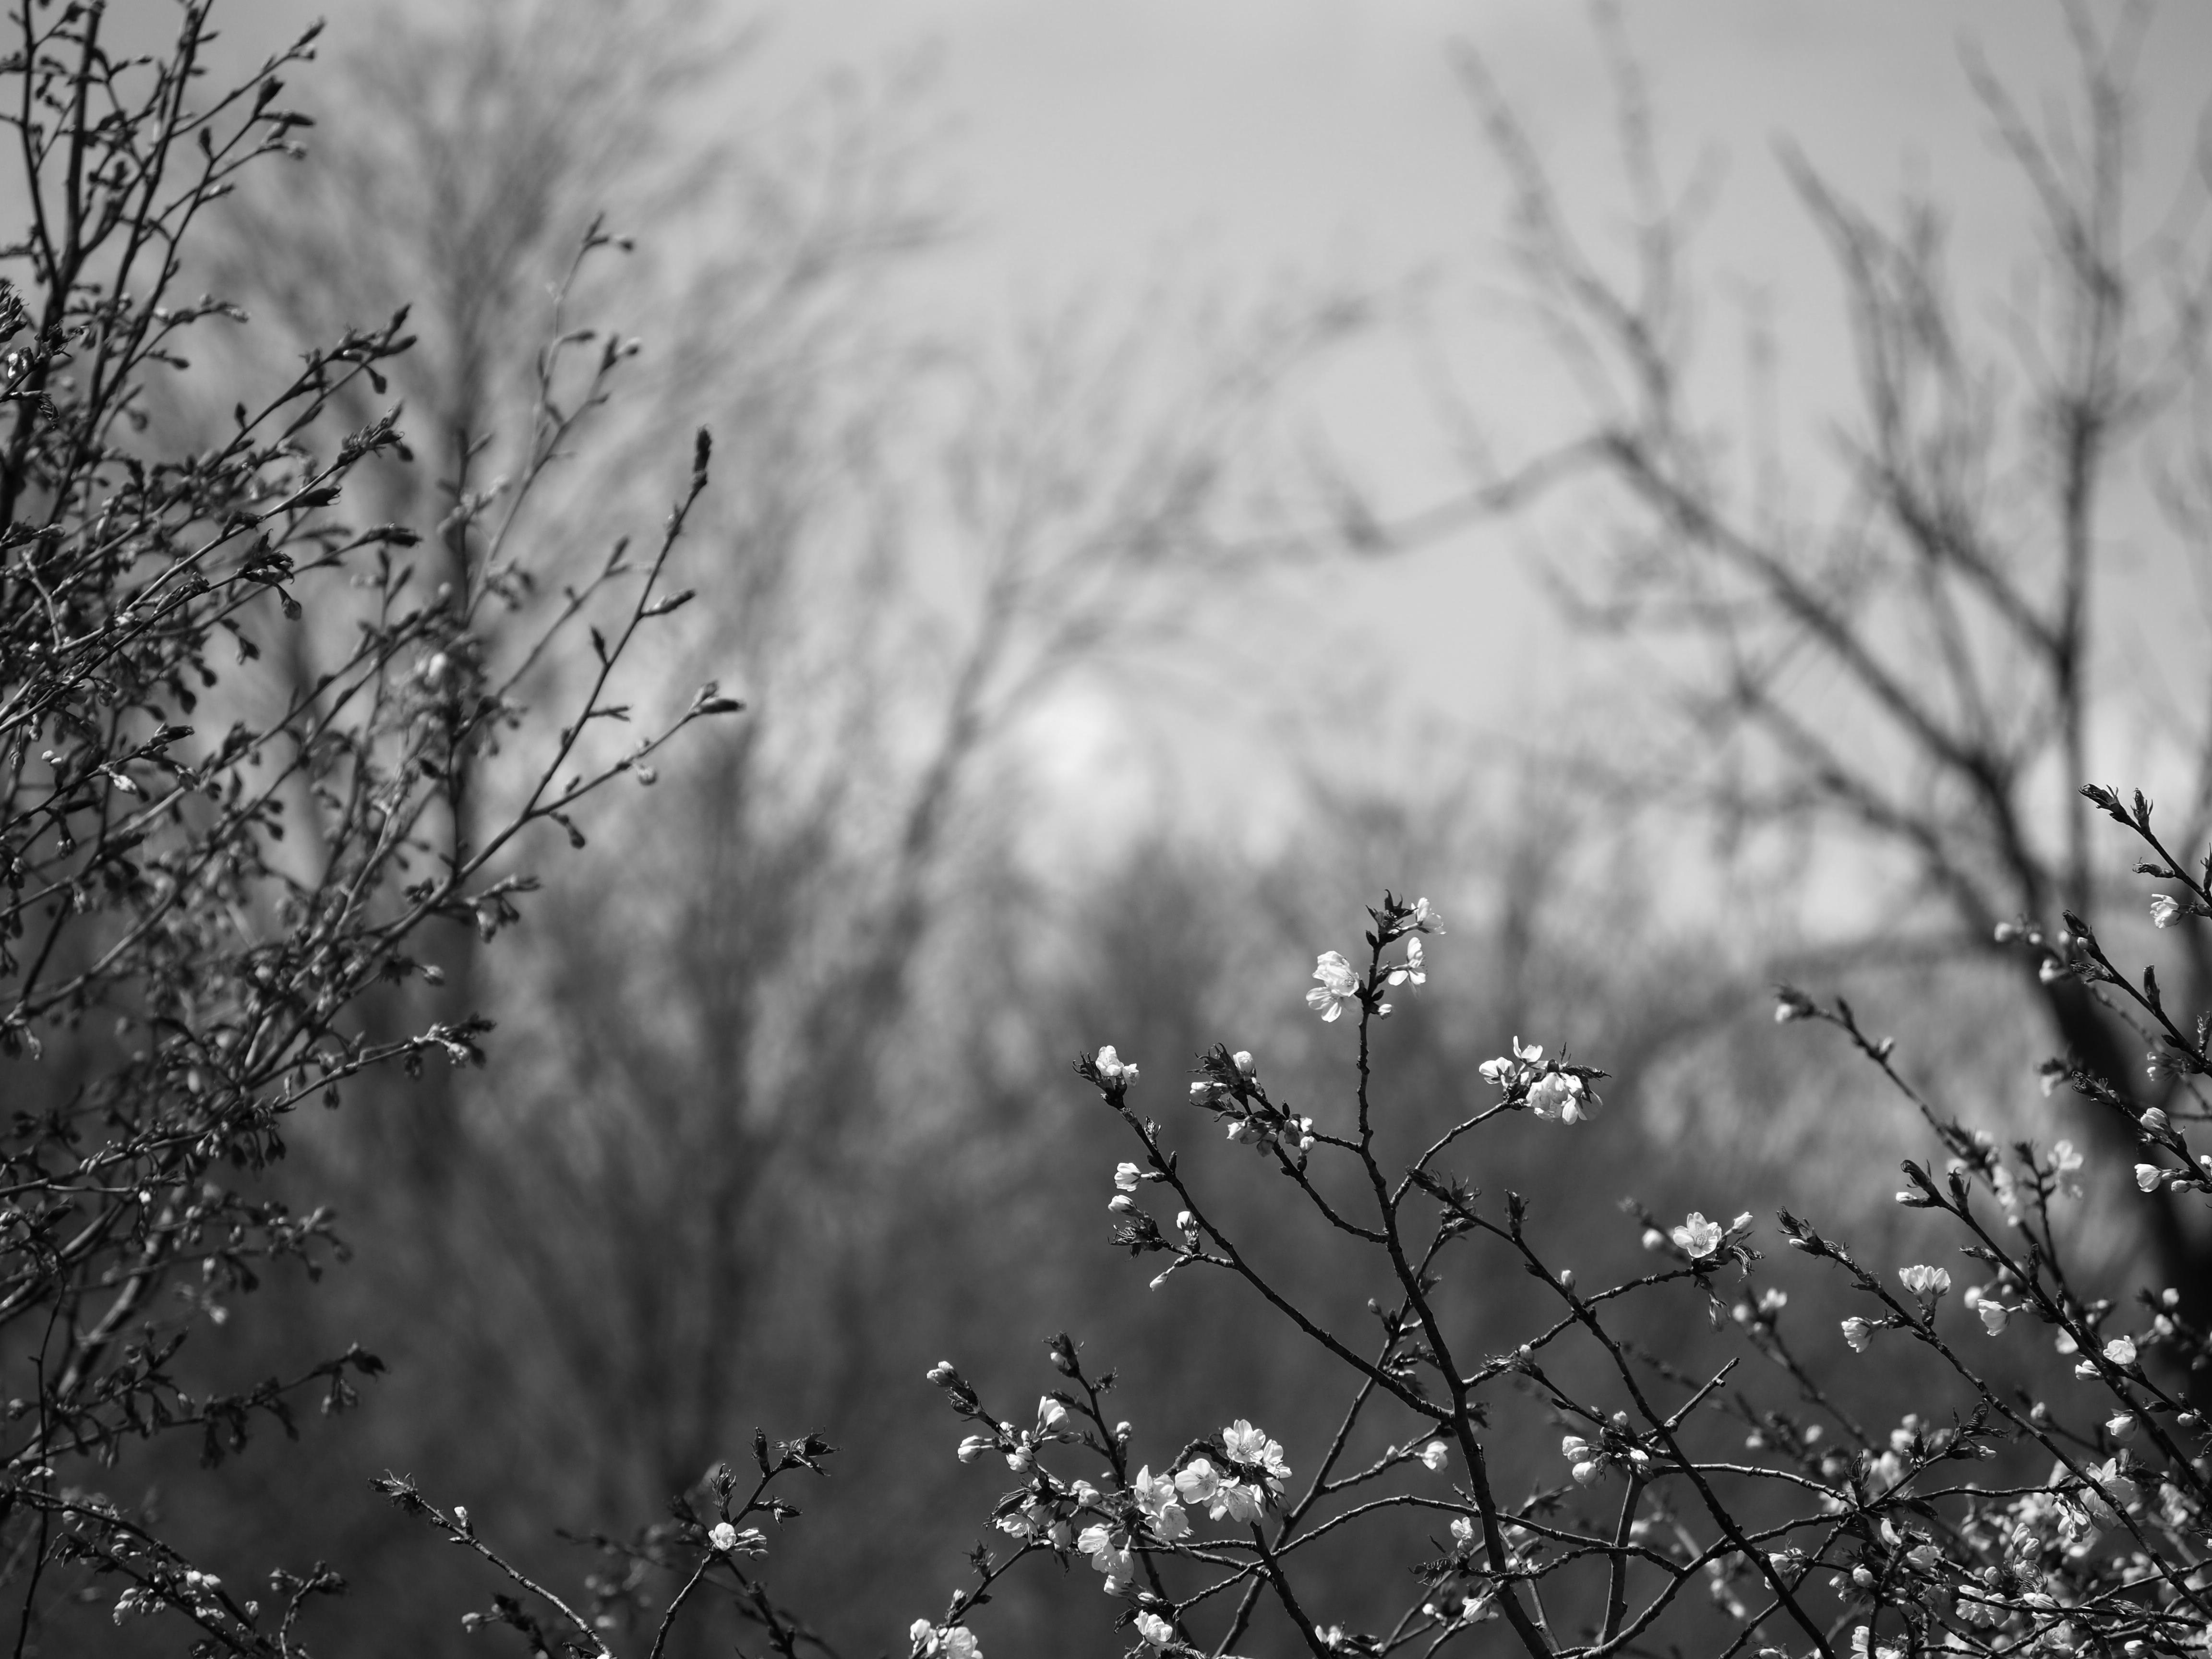

In [10]:
from PIL import Image
im4 = Image.open ('gdrive/My Driver/flower.JPG')
im4= im4.convert ('L')
im4


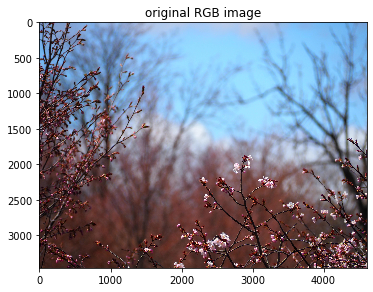

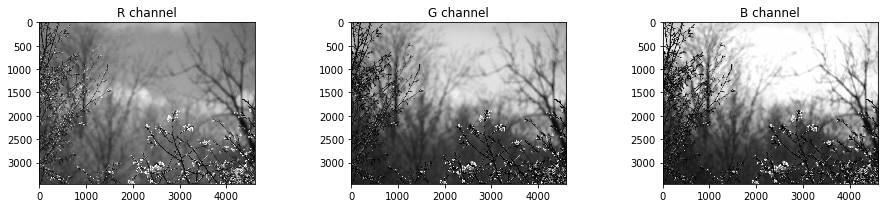

In [11]:
im_n = imread('gdrive/My Driver/flower.JPG')
imshow(im_n)
plt.title("original RGB image")
plt.show()

r_ = im_n[:,:,0]
g_ = im_n[:,:,1]
b_ = im_n[:,:,2]

fig = plt.figure(figsize=(15,3))

for i, c in zip(range(3), 'RGB'):
  ax = fig.add_subplot(1, 3, i+1)
  imshow(im_n[:,:,i], vmin=0, vmax=255)
  plt.title('{} channel'.format(c))

plt.show()



Convert RGB to GRAY scale without library

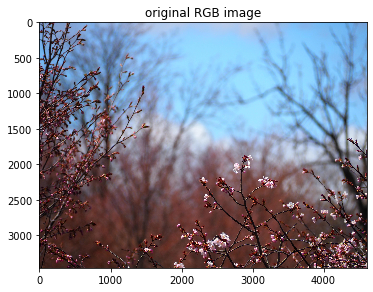

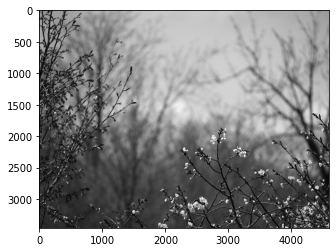

In [12]:
im_n = imread('gdrive/My Driver/flower.JPG')
imshow(im_n)
plt.title("original RGB image")
plt.show()

gray = (im_n[:,:,0].astype(float)*0.299+ 
        im_n[:,:,1].astype(float)*0.587+
        im_n[:,:,2].astype(float)*0.114)

plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)

plt.show()

**Image Brightness and contrast**



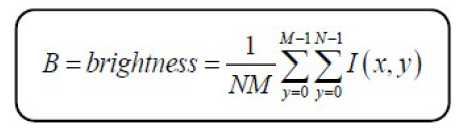

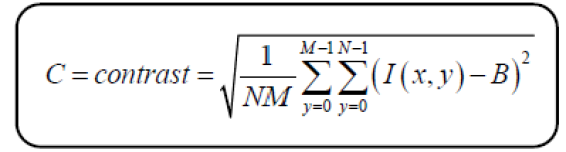

(<matplotlib.image.AxesImage at 0x7f2ae3b75e20>,
 (-0.5, 4607.5, 3455.5, -0.5),
 Text(0.5, 1.0, 'Gray scale image'))

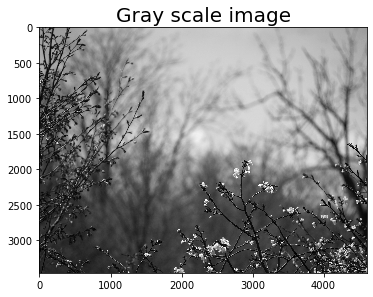

In [13]:
im_b = rgb2gray(imread('gdrive/My Driver/flower.JPG'))
imshow(im3, vmin=0,vmax=1), plt.axis('on'), plt.title('Gray scale image', size=20)

In [14]:
from skimage.util.dtype import img_as_ubyte
h, w = im_b.shape
print('hight:',h ,'weight:', w)
brigthness = 0
for y in range(h):
  for x in range(w):
    brigthness += im_b[y, x]
brigthness /= h * w
print('brigthness:',brigthness)

contrast = 0
for y in range(h):
  for x in range(w):
    contrast += (im_b[y,x]-brigthness)**2
  
contrast /= h*w
print('constrast:', np.sqrt(contrast))

hight: 3456 weight: 4608
brigthness: 0.4728734844594308
constrast: 0.24303500986976456


Histogram

In [15]:
im_file=['sakura.JPG','sky.JPG','parrot.png','flower.JPG']

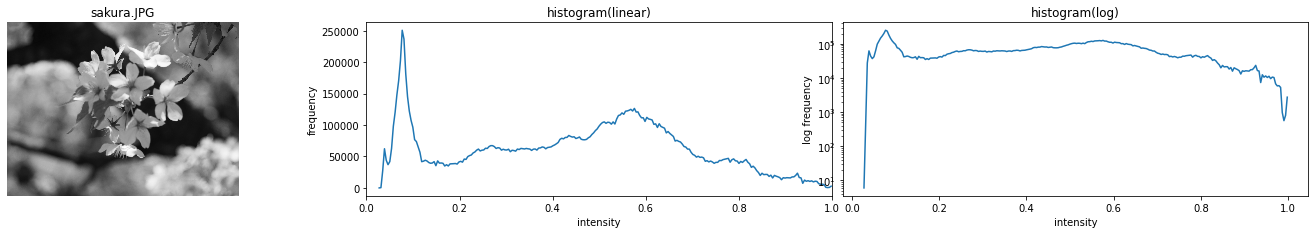

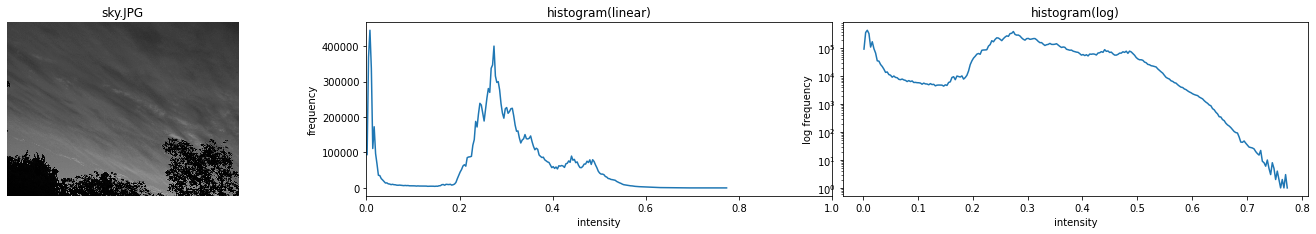

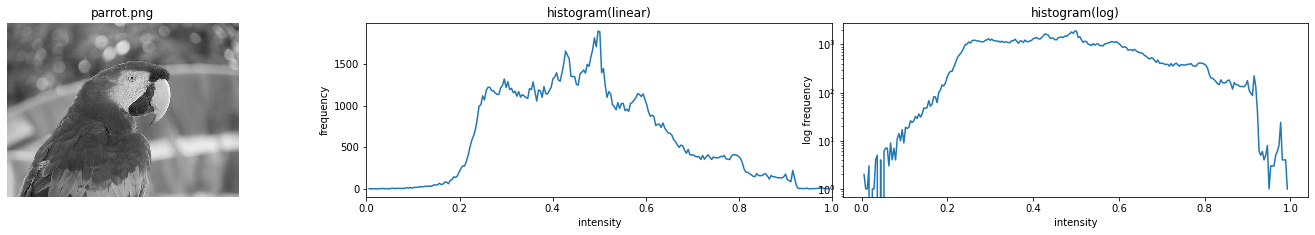

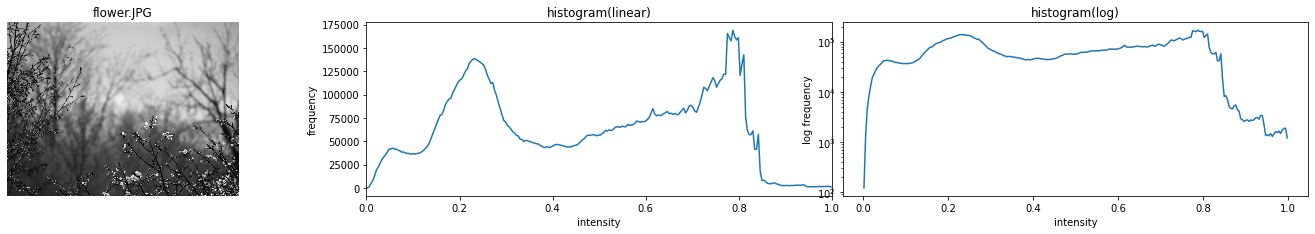

In [21]:
import matplotlib.pyplot as plt
from skimage.exposure.exposure import histogram
for file in im_file:
  im = imread('gdrive/My Driver/'+file)
  
  fig = plt.figure(figsize=(20,3))

  ax = fig.add_subplot(1,3,1)
  im = rgb2gray(im)
  imshow(im)
  plt.title(file)
  plt.axis('off')

  bins = 256
  ax = fig.add_subplot(1,3,2)
  freq,bins = histogram(im)
  plt.plot(bins, freq)
  plt.xlabel("intensity")
  plt.ylabel("frequency")
  plt.title("histogram(linear)")
  plt.xlim(0,1)

  ax = fig.add_subplot(1,3,3)
  bins,freq = histogram(im)
  plt.plot(freq, bins)
  plt.xlabel("intensity")
  plt.ylabel("log frequency")
  plt.yscale('log')
  plt.title("histogram(log)")

  plt.show();